In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
#read df
df = pd.read_csv('../results-dump/distance-based/results-noise-and-variance/results_face.csv')
df = df[df['method'].map(lambda x: x not in ['ORACLE', 'DEM', 'BAU'])]

method       MAS    RANDOM       SAD
noise                               
0.45    0.738014  0.467466  0.731164
0.50    0.806507  0.518836  0.789384
0.55    0.892123  0.546233  0.886986
0.60    0.900685  0.614726  0.898973
0.65    0.967466  0.654110  0.965753
method       MAS    RANDOM       SAD
noise                               
0.45    0.763699  0.426370  0.722603
0.50    0.734589  0.438356  0.700342
0.55    0.868151  0.553082  0.847603
0.60    0.962329  0.633562  0.933219
0.65    0.972603  0.671233  0.965753
method       MAS    RANDOM       SAD
noise                               
0.45    0.998288  0.535959  0.885274
0.50    0.938356  0.575342  0.888699
0.55    0.952055  0.571918  0.886986
0.60    0.955479  0.587329  0.914384
0.65    1.000000  0.719178  0.991438


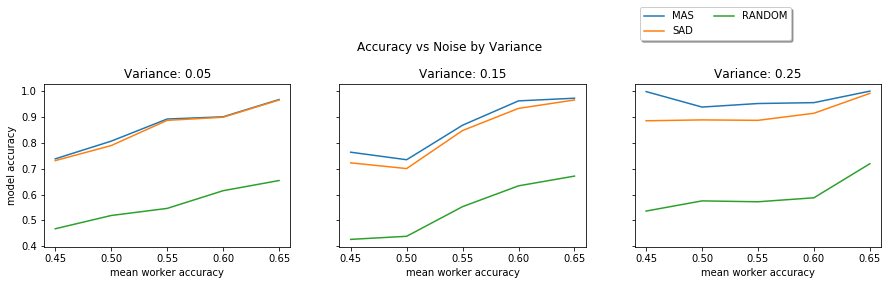

In [68]:
cols = df['suffix'].nunique()
fig, axs = plt.subplots(1, cols, figsize=(15, 3), sharey=True)
fig.suptitle('Accuracy vs Noise by Variance', y=1.08)
# ax1.plot(x, y)
# ax2.plot(x, -y)

ax = 0
for suffix in df['suffix'].unique():
    df_new = df[df['suffix'] == suffix]
    df_new = df_new[['method', 'acc', 'noise']]
    #agg function only matters if you have >1 trial for each noise/variance level
    df_new = df_new.groupby(['method', 'noise']).mean().reset_index()
    df_new = df_new.pivot_table(values='acc', columns='method', index='noise')
    print(df_new)
    for method in df['method'].unique():
        axs[ax].plot(df_new.index, df_new[method], label=method)
    subplot_title = "Variance: " + suffix.strip("var")
    axs[ax].title.set_text(subplot_title)
    axs[ax].set_xlabel('mean worker accuracy')
    ax += 1

axs[0].set_ylabel('model accuracy')
axs[cols - 1].legend(loc="upper left", ncol=2, shadow=True, bbox_to_anchor=[0, 1.5])